# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2021s2



In [ ]:
# TODO: RA & Name 
print('213037 ' + 'André Luis Romão Gouvêa')
print('207267 ' + 'Willian Takayuki Ozako')

213037 André Luis Romão Gouvêa
207267 Willian Takayuki Ozako


## Objective: Predict cancer mortality rates for US counties. 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **TARGET_deathRate** from their attributes.

## Dataset

These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.  

The dataset contains the death rate and attributes of 3,047 counties.

Dataset Information: You should respect the following traininig/test split: 2042 training examples, and 305 test examples.

There are 33 attributes as follows: 

Data Dictionary

- 1: **avgAnnCount**: Mean number of reported cases of cancer diagnosed annually (a)

- 2: **avgDeathsPerYear**: Mean number of reported mortalities due to cancer (a)

- 3: **incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

- 4: **medianIncome**: Median income per county (b)

- 5: **popEst2015**: Population of county (b)

- 6: **povertyPercent**: Percent of populace in poverty (b)

- 7: **studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

- 8: **binnedInc**: Median income per capita binned by decile (b)

- 9: **MedianAge**: Median age of county residents (b)

- 10: **MedianAgeMale**: Median age of male county residents (b)

- 11: **MedianAgeFemale**: Median age of female county residents (b)

- 12: **Geography**: County name (b)

- 13: **AvgHouseholdSize**: Mean household size of county (b)

- 14: **PercentMarried**: Percent of county residents who are married (b)

- 15: **PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

- 16: **PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

- 17: **PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

- 18: **PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

- 19: **PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

- 20: **PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

- 21: **PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

- 22: **PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

- 23: **PctPrivateCoverage**: Percent of county residents with private health coverage (b)

- 24: **PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

- 25: **PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

- 26: **PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

- 27: **PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

- 28: **PctWhite**: Percent of county residents who identify as White (b)

- 29: **PctBlack**: Percent of county residents who identify as Black (b)

- 30: **PctAsian**: Percent of county residents who identify as Asian (b)

- 31: **PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

- 32: **PctMarriedHouseholds**: Percent of married households (b)

- 33: **BirthRate**: Number of live births relative to number of women in county (b)

- **TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities (a)

(a): years 2010-2016

(b): 2013 Census Estimates


The data is available at
- train: https://tinyurl.com/53zvz9t7
- test: https://tinyurl.com/phs3bkbt


## Activities

1. (5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables?




### Tratando os dados

**Atenção:** para que o código funcione, não se esqueça de fazer o upload dos arquivos rodando a célula abaixo e adicionando manualmente os csvs *data-train.csv* e *data-test.csv*. Certifique-se que os nomes são iguais.

In [ ]:
# Fazer upload dos csvs
from google.colab import files
  
uploaded = files.upload()

Saving data-test.csv to data-test.csv
Saving data-train.csv to data-train.csv


In [ ]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
%matplotlib inline

train=pd.read_csv("data-train.csv")
test=pd.read_csv("data-test.csv")

In [ ]:
train.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,170.0,76,456.6,40012,27451,16.1,0.000000,"(37413.8, 40362.7]",43.2,42.1,44.4,"Mineral County, West Virginia",2.40,44.2,9.5,48.4,37.3,4.8,50.2,8.5,47.0,8.8,58.6,45.1,41.6,39.4,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231,198.4
1,232.0,84,480.5,54441,43011,11.4,0.000000,"(51046.4, 54545.6]",38.2,37.1,39.2,"Muscatine County, Iowa",2.59,56.3,15.7,32.9,NaN,8.0,35.0,13.5,63.9,4.6,74.9,54.7,49.4,33.6,15.6,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521,170.9
2,652.0,325,371.0,57719,149568,10.4,608.418913,"(54545.6, 61494.5]",41.7,41.0,42.6,"Monroe County, Michigan",2.55,54.1,12.5,35.6,NaN,7.2,36.2,12.2,56.4,8.3,77.0,59.7,55.4,31.1,14.0,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217,182.8
3,44.0,20,472.2,42624,6561,14.1,0.000000,"(40362.7, 42724.4]",44.8,43.3,47.6,"Bland County, Virginia",2.19,53.5,20.0,53.4,NaN,2.0,39.5,10.6,43.8,8.7,71.6,55.8,48.2,34.3,16.5,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270,220.5
4,581.0,230,467.1,46849,97631,16.6,0.000000,"(45201, 48021.6]",42.0,41.5,42.7,"Steuben County, New York",2.36,50.5,17.2,38.3,NaN,7.0,37.6,11.1,54.6,8.2,66.4,49.1,45.4,39.9,20.7,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742,178.7


Observando as análises estatísticas da tabela *train* abaixo, observamos os seguintes outliers:

- Mediana da renda per capita anual, campo *medincome* com valor máximo muito grande (US$ 125635,00), pertencente ao município Falls Church de Virgínia. Como essa cidade é uma das mais ricas dos EUA, então o valor parece estar correto;

- Valor mediano de idade de um dos municípios deu 624, que com certeza é um valor errado;

- Município com o valor médio de tamanho da família muito grande, 27, e tamanho de família menor que 1, os valores nos intervalos [0,1) e (10,infinito) serão considerados errados;

- A porcentagem de pessoas brancas e a porcentagem de pessoas negras de alguns municípios deram valores maiores que 100%;

- Porcentagem de famílias casadas com valor maior que 100%;

- Taxa de nascimento muito grande, sendo que haviam valores acima de 1000, ainda que a feature representava a quantidade de nascimentos a cada 1000 habitantes em um ano. Valores acima de 1000 foram considerados errados;

Esses outliers serão substituídos pelos valores medianos.

In [ ]:
# Ver estatísticas sobre os valores numéricos
train.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,686.000000,2742.000000,2742.000000,2742.000000,2604.000000,2742.000000,2742.000000,2191.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,46988.582057,1.033009e+05,16.900109,160.281290,45.454996,39.588986,42.182677,2.563626,51.747848,18.230926,34.968089,40.964431,6.165864,34.761926,13.263384,54.057296,7.880708,64.264770,48.330717,41.102954,36.328483,19.285266,141.982602,9.394694,1.239634,2.026429,92.102617,13.644176,178.647301
std,1433.570609,510.943653,54.440848,12152.299253,3.325129e+05,6.406914,547.979242,46.057255,5.201666,5.277583,1.349328,6.928007,8.109004,9.032442,11.112698,4.584779,7.019892,5.414571,8.317480,3.465225,10.598997,10.016273,9.407186,7.846370,6.105076,2209.473029,19.305272,2.534925,3.619381,1514.326555,247.083035,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,0.000000,37.800000,36.400000,39.100000,2.370000,47.725000,12.700000,29.100000,33.900000,3.100000,30.400000,9.300000,48.500000,5.600000,57.100000,41.000000,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45080.000000,2.671000e+04,15.900000,0.000000,41.000000,39.550000,42.400000,2.500000,52.400000,17.200000,34.700000,40.500000,5.400000,35.100000,12.300000,54.400000,7.600000,65.000000,48.600000,41.100000,36.400000,18.800000,89.977678,2.334870,0.544608,0.833393,51.658791,5.382090,178.300000
75%,532.750000,151.000000,480.800000,52386.500000,6.952450e+04,20.400000,87.228018,44.100000,42.600000,45.400000,2.640000,56.300000,22.700000,40.575000,46.400000,8.200000,39.500000,16.100000,60.100000,9.700000,71.900000,55.400000,47.400000,41.600000,23.100000,95.409287,10.746240,1.225619,2.219736,55.387885,6.529063,195.100000
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,27.000000,72.500000,64.100000,72.500000,78.300000,51.800000,54.800000,42.200000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,97625.000000,675.000000,42.619425,41.930251,57275.000000,9375.000000,362.800000


Na célula abaixo, estamos substituindo os outliers pelos valores medianos dos seus respectivos campos. Mostramos, também, o *train* depois de ter seus outliers removidos.

In [ ]:
# Consertando idade mediana no treino e no treino
median_age_train = train['medianage'].median()
train['medianage'].values[train['medianage'] > 100] = median_age_train
median_age_test = test['medianage'].median()
test['medianage'].values[test['medianage'] > 100] = median_age_test

#Consertando tamanho da família no teste e no treino
median_household_train = train['avghouseholdsize'].median()
train['avghouseholdsize'].values[train['avghouseholdsize'] > 10] = median_household_train
train['avghouseholdsize'].values[train['avghouseholdsize'] < 1] = median_household_train
median_household_test = test['avghouseholdsize'].median()
test['avghouseholdsize'].values[test['avghouseholdsize'] > 10] = median_household_test
test['avghouseholdsize'].values[test['avghouseholdsize'] < 1] = median_household_test

# Consertando porcentagem de pessoas brancas e de pessoas negras
median_white_train = train['pctwhite'].median()
median_black_train = train['pctblack'].median()
train['pctwhite'].values[train['pctwhite'] > 100] = median_white_train
train['pctblack'].values[train['pctblack'] > 100] = median_black_train
median_white_test = test['pctwhite'].median()
median_black_test = test['pctblack'].median()
test['pctwhite'].values[test['pctwhite'] > 100] = median_white_test
test['pctblack'].values[test['pctblack'] > 100] = median_black_test

# Consertando porcentagem de famílias casadas
median_holseholdmarried_train = train['pctmarriedhouseholds'].median()
train['pctmarriedhouseholds'].values[train['pctmarriedhouseholds'] > 100] = median_holseholdmarried_train
median_holseholdmarried_test = test['pctmarriedhouseholds'].median()
test['pctmarriedhouseholds'].values[test['pctmarriedhouseholds'] > 100] = median_holseholdmarried_test

# Consertando taxa de nascimentos
median_birthrate_train = train['birthrate'].median()
train['birthrate'].values[train['birthrate'] > 1000] = median_birthrate_train
median_birthrate_test = test['birthrate'].median()
test['birthrate'].values[test['birthrate'] > 1000] = median_birthrate_train

# Consertando os valores de rendas
median_income_train = train['medincome'].median()
train['medincome'].values[train['medincome'] > 60000.0] = median_income_train
median_income_test = test['medincome'].median()
test['medincome'].values[test['medincome'] > 60000.0] = median_income_train

train.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,686.000000,2742.000000,2742.000000,2742.000000,2604.000000,2742.000000,2742.000000,2191.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,43956.094821,1.033009e+05,16.900109,160.281290,40.851787,39.588986,42.182677,2.528585,51.747848,18.230926,34.968089,40.964431,6.165864,34.761926,13.263384,54.057296,7.880708,64.264770,48.330717,41.102954,36.328483,19.285266,83.711251,9.149375,1.239634,2.026429,51.206672,5.647147,178.647301
std,1433.570609,510.943653,54.440848,7318.484646,3.325129e+05,6.406914,547.979242,5.149345,5.201666,5.277583,0.245901,6.928007,8.109004,9.032442,11.112698,4.584779,7.019892,5.414571,8.317480,3.465225,10.598997,10.016273,9.407186,7.846370,6.105076,16.198452,14.526547,2.534925,3.619381,6.576951,1.988645,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,1.860000,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,0.000000,37.800000,36.400000,39.100000,2.380000,47.725000,12.700000,29.100000,33.900000,3.100000,30.400000,9.300000,48.500000,5.600000,57.100000,41.000000,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45079.000000,2.671000e+04,15.900000,0.000000,41.000000,39.550000,42.400000,2.500000,52.400000,17.200000,34.700000,40.500000,5.400000,35.100000,12.300000,54.400000,7.600000,65.000000,48.600000,41.100000,36.400000,18.800000,89.975762,2.333510,0.544608,0.833393,51.658477,5.381894,178.300000
75%,532.750000,151.000000,480.800000,48988.750000,6.952450e+04,20.400000,87.228018,43.800000,42.600000,45.400000,2.630000,56.300000,22.700000,40.575000,46.400000,8.200000,39.500000,16.100000,60.100000,9.700000,71.900000,55.400000,47.400000,41.600000,23.100000,95.391322,10.720141,1.225619,2.219736,55.371682,6.521323,195.100000
max,38150.000000,14010.000000,1206.900000,59975.000000,1.017029e+07,47.400000,9762.308998,65.300000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,78.300000,51.800000,54.800000,42.200000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,362.800000


Temos também casos onde a quantidade de pessoas em tratamento de câncer é maior que o próprio número da população da cidade. Nestes casos, uma vez que consideramos que este campo é de grande importância para o resultado final, consideramos que excluir toda a linha seria a melhor abordagem a ser feita.

In [ ]:
#Excluindo dados onde os casos de cancer são maiores que o número de habitantes da cidade
train.drop(train.index[((train['popest2015'] - train['avganncount']) < 0)])
test.drop(test.index[((test['popest2015'] - test['avganncount']) < 0)])

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,37.0,15,423.8,54556,5619,10.1,0.000000,"(54545.6, 61494.5]",47.5,46.2,49.1,"Fillmore County, Nebraska",2.22,57.5,15.8,33.1,NaN,5.8,39.1,13.5,63.3,3.4,74.7,55.7,44.2,31.9,12.7,97.191504,0.912761,0.017553,1.000527,53.409091,6.001847,150.3
1,1337.0,550,459.6,46388,268441,17.2,972.280687,"(45201, 48021.6]",36.5,35.3,37.6,"St. Joseph County, Indiana",2.50,46.6,13.5,31.9,NaN,10.2,31.2,16.9,58.7,8.5,68.4,55.5,50.0,30.2,17.1,79.528599,12.921428,2.013126,2.037074,46.380079,5.453791,180.3
2,436.0,160,438.7,51629,83632,11.9,0.000000,"(51046.4, 54545.6]",40.9,39.7,42.4,"Midland County, Michigan",2.45,57.2,13.1,34.5,43.6,8.8,29.6,19.4,55.6,8.5,76.5,58.6,53.6,31.9,13.4,93.654932,1.381182,2.330671,0.611069,55.876491,5.762837,154.4
3,387.0,149,413.9,53953,70601,12.0,84.984632,"(51046.4, 54545.6]",45.1,43.8,46.6,"Franklin County, Massachusetts",2.30,47.6,12.9,32.2,43.0,11.8,27.1,18.8,62.6,6.7,73.6,55.2,50.4,40.1,19.0,93.884235,1.295963,1.626279,0.833521,44.848023,3.458754,153.9
4,167.0,75,460.6,42374,28491,17.5,35.098803,"(40362.7, 42724.4]",42.6,42.1,43.1,"Hocking County, Ohio",2.48,54.7,14.5,41.2,NaN,4.2,43.7,10.1,52.7,9.5,62.2,46.0,42.5,39.7,21.6,97.423394,0.819672,0.335478,0.103756,53.903574,5.314640,205.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,249.0,90,519.0,53918,36671,11.9,0.000000,"(51046.4, 54545.6]",41.3,40.2,42.7,"Livingston County, Illinois",2.32,49.9,24.5,42.9,NaN,3.7,40.5,9.4,52.0,6.3,71.8,NaN,44.5,37.6,18.9,92.483218,5.420680,0.286556,0.854361,50.546184,7.034382,176.6
301,146.0,57,463.1,50861,21900,11.0,0.000000,"(48021.6, 51046.4]",44.6,42.9,46.1,"Gage County, Nebraska",2.30,57.8,15.3,37.0,NaN,6.4,34.6,14.1,63.2,4.3,75.9,58.2,48.7,33.2,13.4,96.663306,0.426254,0.417087,0.572921,54.404762,6.416862,165.2
302,215.0,80,417.3,45080,65065,4.0,46.107738,"(61494.5, 125635]",37.5,36.6,38.1,"Broomfield County, Colorado",2.57,58.6,11.5,29.7,NaN,23.0,14.7,32.8,67.4,5.5,82.8,71.3,63.4,19.9,9.5,86.746075,1.001664,6.003394,2.136773,57.201139,5.099793,158.4
303,1551.0,658,466.6,47708,287078,16.9,198.552310,"(45201, 48021.6]",39.2,38.1,40.3,"Winnebago County, Illinois",2.50,48.2,18.6,34.6,38.8,8.0,33.3,14.0,57.4,11.5,64.4,49.8,45.6,38.4,22.9,78.773168,12.533441,2.486925,3.091183,46.527144,5.573941,191.5


No campo a seguir, vemos a contagem de valores brancos em cada campo e como a quantidade de amostras é pequena, 2742, e parte ainda será usada para a validação, então decidimos por excluir esses três campos que têm valores em branco.

In [ ]:
# Vendo por campos em branco
train.isna().sum()

avganncount                   0
avgdeathsperyear              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2056
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          138
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     551
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

O campo abaixo mostra que todos os nomes de municípios são valores únicos, i.e. temos apenas uma amostra por município e isso mostra que não vale a pena usar esse campo no treinamento, já que ou a regressão irá ignorar esse campo (porque não tem correlação entre o nome e a taxa de mortalidade por câncer) ou pior, ele irá decorar que uma cidade *X* tem mortalidade *Y*. Logo deixar o campo *geography* trará, na melhor das possibilidades, uma contribuição nula para a nossa análise.

In [ ]:
#Porcentagem de valores únicos no campo geography
len(pd.unique(train['geography'])) / len(train['geography']) * 100

100.0

Como discutido acima, iremos excluir os campos *geography* e aqueles campos que têm valores brancos ou NaN. Também excluiremos o campo *binnedinc*, porque ele apresenta o intervalo mediano das rendas, e, possui um intervalo de valores, temos que converter para o tipo *float*, mas assim ele fica redundante com o valor mediana de renda, fazendo com que tenhamos optado por excluir ele e manter a mediana da renda per capita. O campo *studypercap* também será excluído, pois, apesar de ser potencialmente importante, apresenta mais da metade de seus valores zerados, criando uma chance muito maior dele ser uma influência negativa do que uma positiva para o resultado final a ser obtido.

In [ ]:
# Excluindo coluna binnedinc
train.drop('binnedinc', axis=1, inplace=True)
test.drop('binnedinc', axis=1, inplace=True)

# Excluindo geography
train.drop('geography', axis=1, inplace=True)
test.drop('geography', axis=1, inplace=True)

# Excluindo porcentagem do grupo de 18 a 24 anos que fez alguma faculdade
train.drop('pctsomecol18_24', axis=1, inplace=True)
test.drop('pctsomecol18_24', axis=1, inplace=True)

# Excluindo porcentagem do grupo maior de 16 anos empregado
train.drop('pctemployed16_over', axis=1, inplace=True)
test.drop('pctemployed16_over', axis=1, inplace=True)

# Excluindo porcentagem do grupo que fez estudou somente em escola particular
train.drop('pctprivatecoveragealone', axis=1, inplace=True)
test.drop('pctprivatecoveragealone', axis=1, inplace=True)

# Excluindo studypercap 
train.drop('studypercap', axis=1, inplace=True)
test.drop('studypercap', axis=1, inplace=True)

In [ ]:
train.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
count,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,615.856989,187.976659,448.119963,43956.094821,1.033009e+05,16.900109,40.851787,39.588986,42.182677,2.528585,51.747848,18.230926,34.968089,6.165864,34.761926,13.263384,7.880708,64.264770,41.102954,36.328483,19.285266,83.711251,9.149375,1.239634,2.026429,51.206672,5.647147,178.647301
std,1433.570609,510.943653,54.440848,7318.484646,3.325129e+05,6.406914,5.149345,5.201666,5.277583,0.245901,6.928007,8.109004,9.032442,4.584779,7.019892,5.414571,3.465225,10.598997,9.407186,7.846370,6.105076,16.198452,14.526547,2.534925,3.619381,6.576951,1.988645,27.738109
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,22.300000,22.400000,22.300000,1.860000,23.100000,0.000000,0.000000,0.000000,7.500000,2.500000,0.400000,22.300000,13.500000,11.800000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.425000,38750.500000,1.166025e+04,12.200000,37.800000,36.400000,39.100000,2.380000,47.725000,12.700000,29.100000,3.100000,30.400000,9.300000,5.600000,57.100000,34.300000,31.100000,15.000000,77.341176,0.634163,0.256324,0.296088,47.729903,4.527412,161.400000
50%,173.000000,61.000000,453.549422,45079.000000,2.671000e+04,15.900000,41.000000,39.550000,42.400000,2.500000,52.400000,17.200000,34.700000,5.400000,35.100000,12.300000,7.600000,65.000000,41.100000,36.400000,18.800000,89.975762,2.333510,0.544608,0.833393,51.658477,5.381894,178.300000
75%,532.750000,151.000000,480.800000,48988.750000,6.952450e+04,20.400000,43.800000,42.600000,45.400000,2.630000,56.300000,22.700000,40.575000,8.200000,39.500000,16.100000,9.700000,71.900000,47.400000,41.600000,23.100000,95.391322,10.720141,1.225619,2.219736,55.371682,6.521323,195.100000
max,38150.000000,14010.000000,1206.900000,59975.000000,1.017029e+07,47.400000,65.300000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,51.800000,54.800000,42.200000,29.400000,92.300000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,362.800000


Separando o *X* do *y* na célula abaixo.

In [ ]:
x = train.iloc[:,:-1]
# x = train.iloc[:,[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26]]
y = train.iloc[:,-1]

In [ ]:
x.head()


,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,170.0,76,456.6,40012,27451,16.1,43.2,42.1,44.4,2.40,44.2,9.5,48.4,4.8,50.2,8.5,8.8,58.6,41.6,39.4,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231
1,232.0,84,480.5,54441,43011,11.4,38.2,37.1,39.2,2.59,56.3,15.7,32.9,8.0,35.0,13.5,4.6,74.9,49.4,33.6,15.6,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521
2,652.0,325,371.0,57719,149568,10.4,41.7,41.0,42.6,2.55,54.1,12.5,35.6,7.2,36.2,12.2,8.3,77.0,55.4,31.1,14.0,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217
3,44.0,20,472.2,42624,6561,14.1,44.8,43.3,47.6,2.19,53.5,20.0,53.4,2.0,39.5,10.6,8.7,71.6,48.2,34.3,16.5,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270
4,581.0,230,467.1,46849,97631,16.6,42.0,41.5,42.7,2.36,50.5,17.2,38.3,7.0,37.6,11.1,8.2,66.4,45.4,39.9,20.7,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742


Normalizando *X* antes de prosseguir com o treino.

In [ ]:
x_mean = x.mean()
x_min = x.min()
x_max = x.max()

In [ ]:
x_norm = (x - x_mean) / (x_max - x_min)

In [ ]:
x_norm.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,-0.011689,-0.007994,0.008516,-0.105641,-0.007459,-0.018102,0.054610,0.059362,0.051090,-0.060941,-0.152790,-0.136208,0.185268,-0.026368,0.326386,-0.119984,0.031700,-0.080925,0.008690,0.057627,0.091244,0.123652,-0.069856,-0.022069,-0.044290,-0.149463,0.081781
1,-0.010063,-0.007423,0.032517,0.280833,-0.005929,-0.124437,-0.061669,-0.058841,-0.068725,0.029107,0.092149,-0.039484,-0.028525,0.035408,0.005033,0.005960,-0.113128,0.151932,0.145053,-0.051191,-0.083756,0.091628,-0.088450,0.000057,0.008803,0.072892,0.043391
2,0.000948,0.009782,-0.077445,0.368633,0.004550,-0.147061,0.019726,0.033357,0.009616,0.010149,0.047614,-0.089406,0.008716,0.019964,0.030403,-0.026786,0.014458,0.181932,0.249948,-0.098095,-0.120120,0.121347,-0.079430,-0.014612,-0.033839,0.058906,0.021339
3,-0.014992,-0.011992,0.024182,-0.035680,-0.009513,-0.063351,0.091819,0.087731,0.124823,-0.160467,0.035469,0.027599,0.254233,-0.080422,0.100171,-0.067088,0.028251,0.104789,0.124074,-0.038058,-0.063302,0.117033,-0.047946,-0.029086,-0.048329,0.043377,-0.020345
4,-0.000914,0.003000,0.019060,0.077485,-0.000558,-0.006790,0.026703,0.045178,0.011920,-0.079898,-0.025260,-0.016083,0.045957,0.016103,0.060002,-0.054493,0.011010,0.030503,0.075123,0.067008,0.032153,0.125475,-0.088222,0.006799,-0.040352,-0.076381,0.056719


Separando dados para usar como treino (90% do csv *data-train.csv*) e para validação (10%).

In [ ]:
# Separando teste de valicação com proporção de 90% e 10% respectivamente
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_norm, y, test_size=0.10, random_state=42)

### Nossa Implementação da Regressão Linear

Abaixo, criamos a nossa implementação da regressão linear com duas funções, uma para o fit do modelo e outro para calcular o score do modelo calculado cujos coeficientes estão armazenados em um vetor **theta**. Utilizamos a regressão linear com gradient descent. 

Respeitamos a equação de score para que fosse igual a equação de erro usada em SGDRegressor: 1 - u/v, onde u = ((y_true - y_pred)\** 2).sum() e v = ((y_true - y_true.mean()) \** 2).sum() [fonte: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.score]

In [ ]:
# Nossa solução manual para a regressão linear

def OurLinearRegression_fit(X_df, y_df, max_iter=5000, alpha=0.0016):
  m = len(y_df.values)
  n = int(X_df.dtypes.astype(str).value_counts()) + 1
  theta = np.random.rand(n,1)
  X = np.insert(X_df.values, 0, np.ones(m), axis=1)
  y = y_df.values.reshape(-1,1)
  J = []
  for _ in range(max_iter):
    h = np.dot(theta.T, X.T).T
    J.append(1 / (2 * m) * np.sum((h - y) ** 2))
    new_theta = np.ones((n,1))
    for i in range(n):
      new_theta[i] = theta[i] - alpha / m * np.dot((h - y).T, X[:, i])
    theta = new_theta
  return theta, J

def OurLinearRegression_score(X_df, y_df, theta):
  m = len(y_df.values)
  X = np.insert(X_df.values, 0, np.ones(m), axis=1)
  y_true = y_df.values.reshape(-1,1)
  theta = theta.reshape(-1,1)
  h = np.dot(theta.T, X.T).T  #Nao está falntando um .T aki?
  score = 1 - np.sum((y_true - h) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
  return score

Calculamos o valor de theta do modelo linear com nossa implementação e testamos o desempenho do resultado de nossa implementação utilizando os dados de validação. Depois plotamos o gráfico de custo em função das épocas para ver se o algoritmo está funcionando como deveria.

In [ ]:
result, J = OurLinearRegression_fit(x_train, y_train)

In [ ]:
OurLinearRegression_score(x_valid, y_valid, result)

0.29810602990290946

Text(0.5, 1.0, 'Custo x Época')

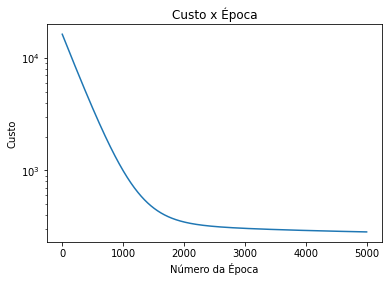

In [ ]:
plt.plot(list(range(len(J))), J)
plt.xlabel('Número da Época')
plt.ylabel('Custo')
plt.yscale('log')
plt.title('Custo x Época')

### Utilizando o Método SGDRegressor Fornecido pelo Scikit-tLearn

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.
model1 = linear_model.SGDRegressor(max_iter=2500)
model1.fit(x_train, y_train)
model1.score(x_valid, y_valid)

0.5035311741915308

In [ ]:
model1.score(x_train, y_train)

0.5253809932879644


> What are the conclusions? (1-2 paragraphs)




Primeiramente, gostariamos de ressaltar a importância da análise prévia dos dados, onde após a exclusão de outliers, valores impossíveis e colunas majoritariamente zeradas, garantimos que estes dados não irão exercer influências negativas para o cálculo de nosso modelo. Outro ponto importante é que os dados categóricos foram excluídos como dito anteriormente (*geography* são valores únicos que identificam cada região e *binnedInc* é um valor redundante ao *medianIncome*).

Dito isto, pode-se analisar o modelo linear implementado por nós como uma função que, apesar de apresentar um resultado bem abaixo se comparado ao score advindo da função da biblioteca *sklearn* para o mesmo conjunto de dados, ofere valores significativos (melhores que valores aleatórios) como predições para o problema, além de que, se analisarmos o gráfico de Custo x Época, podemos ver que a função Custo decai conforme as Épocas aumentam (o que era de se esperar), e que, no caso do modelo analisado, esta curva que se aproxima de um platô é a desejada, uma vez que representa uma função de custo que está se aproximando do zero ao avançar das Épocas, da mesma forma em que se colocarmos um valor muito alto para o alpha (i.e. alpha = 2), obtemos um gráfico totalmente diferente, e condizente ao esperado (a curva chegaria em um valor baixo, porém começaria a aumentar após um tempo, representando que o valor de alpha usado foi tão alto que 'pulou' os mínimos locais e começou a aumentar de novo). Por fim, acreditamos que o modelo linear está com underfit, visto que realizando o score com os dados do treino e da validação foram bem próximos e têm um erro ainda grande e que poderia ser melhorado.

2. (2 points) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [ ]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.

# Equação Normal é com LinearRegression do sklearn
normal_eq = linear_model.LinearRegression()
normal_eq.fit(x_train, y_train)

# Usando o learning rate = 'constant' para usar o eta0 como o nosso alpha visto em sala de aula
gd_1 = linear_model.SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=2500)
gd_1.fit(x_train, y_train)

gd_2 = linear_model.SGDRegressor(learning_rate='constant', eta0=0.05, max_iter=2500)
gd_2.fit(x_train, y_train)

gd_3 = linear_model.SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=2500)
gd_3.fit(x_train, y_train)

gd_4 = linear_model.SGDRegressor(learning_rate='constant', eta0=0.0001, max_iter=2500)
gd_4.fit(x_train, y_train)

gd_5 = linear_model.SGDRegressor(learning_rate='constant', eta0=0.10, max_iter=2500)
gd_5.fit(x_train, y_train)

print('Regressão linear com eq. normal: score = %.6f' %normal_eq.score(x_valid, y_valid))
print('SGD com learning rate = 0.01: score = %.6f' %gd_1.score(x_valid, y_valid))
print('SGD com learning rate = 0.05: score = %.6f' %gd_2.score(x_valid, y_valid))
print('SGD com learning rate = 0.001: score = %.6f' %gd_3.score(x_valid, y_valid))
print('SGD com learning rate = 0.0001: score = %.6f' %gd_4.score(x_valid, y_valid))
print('SGD com learning rate = 0.1: score = %.6f' %gd_5.score(x_valid, y_valid))


#Estão dando errados o 2º e 3º (0.0 == valor fixo de predição), mais informações no site:
#site: https://scikit-learn.org/stable/modules/sgd.html#regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet


#dif_l_r.fit(train.loc[:, train.columns != 'target_deathrate'], target)

#print(dif_l_r.score(train.loc[:, train.columns != 'target_deathrate'], target)

Regressão linear com eq. normal: score = 0.520791
SGD com learning rate = 0.01: score = 0.517383
SGD com learning rate = 0.05: score = 0.516472
SGD com learning rate = 0.001: score = 0.500725
SGD com learning rate = 0.0001: score = 0.499846
SGD com learning rate = 0.1: score = 0.490392


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Observamos experimentalmente que a solução com Equação Normal apresentou um desempenho levemente superior que as soluções do sklearn utilizando o *Stochastic Gradient Descent* (*SGD*) em todas as execuções feitas. Isto provavelmente se deve ao fato de que como a Equação Normal é feita analiticamente e não iterativamente e como as colunas de X são linearmente independentes (há solução da inversa da matrix), então ela sempre chega ao mínimo global. Enquanto isso, como o processo iterativo depende da inicialização de *theta*, que provavelmente é inicializado com valores aleatórios, então dependendo da "sorte" podemos chegar a valores mais próximos do mínimo global, gerando assim a diferença de valores entre execuções com os mesmos dados de treino e de validação.

Já se formos analisar os resultados ao alterar-se o valor de eta0 (que representa o learning rate visto em aula), vemos que os scores da função com um eta0=0.1 são muito voláteis, mas acabam sendo, em geral, bem piores que os demais. Isto pode ser explicado pelo uso de um valor muito grande de learning rate, fazendo com que a função acabe por não conseguir achar os minimos da função de custo com tanta facilidade; os scores apresentados pelos eta0=0.01 e eta0=0.05 podem ser tidos comos os mais apropriados para a situação específica, pois, dentre os resultados de funções usando o *SGDRegressor* eles obtém os melhores valores na maioria das vezes; continuando a diminuir os valores usados para eta0, ao usarmos eta0=0.001 e eta0=0.0001, obtemos em geral valores de score menores, condizentes ao que esperávamos da teoria, que diz que para valores muito pequenos para o learning rate, a função custo pode acabar caindo em pequenos mínimos locais, ou ainda demorar muito mais para convergir, como no caso do learning com eta0=0.001 foi tão lento que o método pára pelo limite de iterações e não porque ele convergiu.

3. (2 points) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


Primeiramente, como o coeficiente para *IncidenceRate* tinha o maior valor para o SGD do sklearn, suspeitamos que seria melhor encontrar a combinação com esse campo que levasse a algo mais próximo do nosso resultado *TARGET_deathRate* e chegamos nos gráficos a duas células abaixo, onde foram essas combinações que obtiveram um resultado mais interessante. 

Podemos ver que por exemplo a multiplicação de *IncidenceRate* com *PublicCoverageOnly* é bastante interessante e este é ilustrado no gráfico localizado na terceira linha e segunda coluna. Para deixar claro, vendo da esquerda para a direita, de cima para baixo temos o *TARGET_deathRate* em função de:

- IncidenceRate ^ 2
- IncidenceRate * PovertyPercent
- IncidenceRate * PctHS25_Over
- IncidenceRate * PctUnemployed16_Over
- IncidenceRate * PctPublicCoverage
- IncidenceRate * PctPublicCoverageOnly

In [ ]:
model1.coef_

array([ -4.09772652,   7.12281052, 158.26367736, -15.54572093,
         0.20978423,   2.29006036,  -5.89091993,  -9.40584895,
       -16.86950447, -23.61998163,  15.49954739,  -8.18020195,
        20.48179727,  -8.28433045,  21.7149615 , -45.17774647,
        13.03933826, -24.12598978,  19.47276081,   0.98384261,
        18.83255005,  -6.50053032,   0.53314749,  -1.91502919,
       -33.1254206 , -20.78249045, -20.35318395])

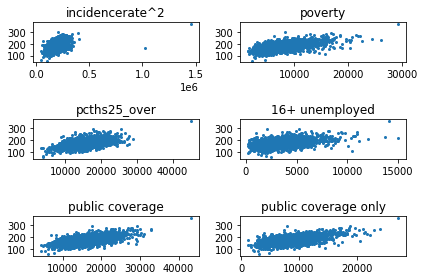

In [ ]:
plt.subplot(3,2,1)
dominio = x['incidencerate'] * x['incidencerate']
plt.plot(dominio, y,'o',ms=2)
plt.title('incidencerate^2')
plt.tight_layout()

plt.subplot(3,2,2)
dominio = x['incidencerate'] * x['povertypercent']
plt.plot(dominio, y,'o',ms=2)
plt.title('poverty')
plt.tight_layout()

plt.subplot(3,2,3)
dominio = x['incidencerate'] * x['pcths25_over']
plt.plot(dominio, y,'o',ms=2)
plt.title('pcths25_over')
plt.tight_layout()

plt.subplot(3,2,4)
dominio = x['incidencerate'] * x['pctunemployed16_over']
plt.plot(dominio, y,'o',ms=2)
plt.title('16+ unemployed')
plt.tight_layout()

plt.subplot(3,2,5)
dominio = x['incidencerate'] * x['pctpubliccoverage']
plt.plot(dominio, y,'o',ms=2)
plt.title('public coverage')
plt.tight_layout()

plt.subplot(3,2,6)
dominio = x['incidencerate'] * x['pctpubliccoveragealone']
plt.plot(dominio, y,'o',ms=2)
plt.title('public coverage only')
plt.tight_layout()



Considerando que expoentes negativos também valeriam para o nosso modelo polinomial, encontramos outro resultado bastante interessante que é o termo $AvgDeathsPerYear / PopEst2015$, que apresenta um espalhamento interessante parecendo que esse termo cresce linearmente com o valor *TARGET_deathRate*.

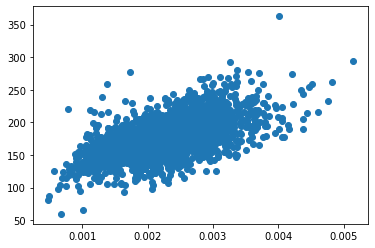

In [ ]:
dominio = x['avgdeathsperyear'] / x['popest2015']
plt.plot(dominio, y, 'o')

Porém, apenas o termo $AvgDeathsPerYear / PopEst2015$ apresentou um resultado interessante, com o acrécimo de quase 0.3 no score com o dataset do treino.

In [ ]:
# x['inciderate**2'] = x['incidencerate'] ** 2
# x['incidence x poverty'] = x['incidencerate'] * x['povertypercent']
# x['incidence x pcths25+'] =  x['incidencerate'] * x['pcths25_over']
# x['incidence x pub only'] = x['incidencerate'] * x['pctpubliccoveragealone']
x['death/pop2015'] = x['avgdeathsperyear'] / x['popest2015'] #* x['pctpubliccoveragealone']

In [ ]:
# Guardar valores para serem usados posteriormente no treino!
x_mean = x.mean()
x_min = x.min()
x_max = x.max()

In [ ]:
x_norm = (x - x_mean) / (x_max - x_min)

In [ ]:
x_norm.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,death/pop2015
0,-0.011689,-0.007994,0.008516,-0.105641,-0.007459,-0.018102,0.054610,0.059362,0.051090,-0.060941,-0.152790,-0.136208,0.185268,-0.026368,0.326386,-0.119984,0.031700,-0.080925,0.008690,0.057627,0.091244,0.123652,-0.069856,-0.022069,-0.044290,-0.149463,0.081781,0.102527
1,-0.010063,-0.007423,0.032517,0.280833,-0.005929,-0.124437,-0.061669,-0.058841,-0.068725,0.029107,0.092149,-0.039484,-0.028525,0.035408,0.005033,0.005960,-0.113128,0.151932,0.145053,-0.051191,-0.083756,0.091628,-0.088450,0.000057,0.008803,0.072892,0.043391,-0.072814
2,0.000948,0.009782,-0.077445,0.368633,0.004550,-0.147061,0.019726,0.033357,0.009616,0.010149,0.047614,-0.089406,0.008716,0.019964,0.030403,-0.026786,0.014458,0.181932,0.249948,-0.098095,-0.120120,0.121347,-0.079430,-0.014612,-0.033839,0.058906,0.021339,-0.025530
3,-0.014992,-0.011992,0.024182,-0.035680,-0.009513,-0.063351,0.091819,0.087731,0.124823,-0.160467,0.035469,0.027599,0.254233,-0.080422,0.100171,-0.067088,0.028251,0.104789,0.124074,-0.038058,-0.063302,0.117033,-0.047946,-0.029086,-0.048329,0.043377,-0.020345,0.162669
4,-0.000914,0.003000,0.019060,0.077485,-0.000558,-0.006790,0.026703,0.045178,0.011920,-0.079898,-0.025260,-0.016083,0.045957,0.016103,0.060002,-0.054493,0.011010,0.030503,0.075123,0.067008,0.032153,0.125475,-0.088222,0.006799,-0.040352,-0.076381,0.056719,0.013788


In [ ]:
# Separando teste de valicação com proporção de 90% e 10% respectivamente
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_norm, y, test_size=0.10, random_state=42)

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.
pol = linear_model.SGDRegressor(max_iter=2500)
pol.fit(x_train, y_train)
pol.score(x_valid, y_valid)

0.7819666956617015

In [ ]:
for name, value in zip(x_train.columns, pol.coef_):
  print(f'{name} = {value}')

avganncount = -14.845082436654756
avgdeathsperyear = 5.446811485601044
incidencerate = 95.77798663622961
medincome = -4.012183462782149
popest2015 = 3.1674307889596296
povertypercent = -3.100717716121415
medianage = -38.421922503839625
medianagemale = -28.58314718399097
medianagefemale = -55.72138873928867
avghouseholdsize = 2.529292830758082
percentmarried = -6.597670990677813
pctnohs18_24 = 1.5541941558306867
pcths18_24 = 24.637116500410787
pctbachdeg18_24 = -0.08613012754544284
pcths25_over = -1.4369147040605874
pctbachdeg25_over = -14.256109948681893
pctunemployed16_over = 27.567750478612304
pctprivatecoverage = -34.66262769829052
pctempprivcoverage = 35.92007908874874
pctpubliccoverage = -40.161877943985985
pctpubliccoveragealone = 31.738088561317422
pctwhite = -10.792729504224068
pctblack = 3.2403789221332664
pctasian = -2.848916659749474
pctotherrace = -21.381794698357695
pctmarriedhouseholds = 15.622582843682114
birthrate = -17.27287780746171
death/pop2015 = 202.19391676331009



 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


Comparando os resultado antes e após a expansão do modelo linear para o modelo "polinomial", observamos uma melhora do desempenho muito boa de 0,50 para aproximadamente 0,79, assim concluímos que o modelo linear realmente não era o suficiente e que ele está mais próximo do termo "polinomial" $AvgDeathsPerYear / PopEst2015$, visto que seu coeficiente (ver célula acima) é maior em valor absoluto.

Como constatamos que o modelo linear é insuficiente para resolver esse problema, o próximo passo seria tentar encontrar quais combinações de multiplicações e divisões entre as colunas deveriam ser feitas para se chegar a um modelo que pudesse predizer resultados mais próximos aos esperados pelo target. Devido ao tempo limitado para realizar essas novas buscas e também devido a não termos conhecimento de uma maneira eficiente de realizar essas combinações sem acrescentar demasiadamente valores novos em X, acabamos por deixar o modelo como está.

4. (1 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

Como não encontramos uma maneira mais fácil de extrair os valores de custos por iteração da regressão, configuramos o SGDRegressor para verboso e desviamos a saída padrão para uma variável e por fim aplicamos RegEx para conseguir extrair o valor de custo do nosso modelo final, que acrescentamos o valor de $AvgDeathsPerYear / PopEst2015$ em X.

In [ ]:
import re
import sys
from io import StringIO

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

pol = linear_model.SGDRegressor(max_iter=2500, verbose=1)
pol.fit(x_train, y_train)
pol.score(x_valid, y_valid)

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
cost = list(map(lambda x: float(x.split()[-1]), re.findall('loss: \d+.\d*', loss_history)))


Text(0.5, 1.0, 'Custo x Época')

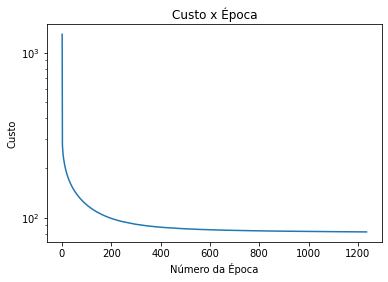

In [ ]:
plt.plot(list(range(1, len(cost) + 1)), cost)
plt.yscale('log')
plt.xlabel('Número da Época')
plt.ylabel('Custo')
plt.title('Custo x Época')

Com o modelo final escolhido, realizamos por fim a adaptação do teste para o modelo polinomial e avaliamos o modelo de regressão, obtendo um score de aproximadamente 0,72.

In [ ]:
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
x_test['death/pop2015'] = x_test['avgdeathsperyear'] / x_test['popest2015']

In [ ]:
x_test = (x_test - x_mean) / (x_max - x_min)

In [ ]:
x_test.describe()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,death/pop2015
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,-0.002493,-0.001434,0.001491,0.022731,-0.000652,-0.004958,-0.006115,-0.004313,-0.008598,0.002939,0.005224,-0.001009,0.004682,-0.001461,0.009026,0.004688,-0.009747,0.012869,0.016307,-0.014215,-0.010261,-0.006608,-0.004748,0.003359,-0.010223,0.006216,-0.004096,-0.010522
std,0.032767,0.031307,0.055935,0.192679,0.029170,0.145606,0.124829,0.128750,0.125011,0.122658,0.133955,0.124200,0.129766,0.077210,0.151563,0.131458,0.114803,0.157924,0.170982,0.145959,0.140442,0.199306,0.170129,0.075351,0.056971,0.118469,0.091375,0.118780
min,-0.015936,-0.013206,-0.247861,-0.527416,-0.009992,-0.291858,-0.403530,-0.361442,-0.446605,-0.255254,-0.478701,-0.259453,-0.333353,-0.119032,-0.424142,-0.253486,-0.254507,-0.560925,-0.424877,-0.471454,-0.297392,-0.809597,-0.106453,-0.029086,-0.048329,-0.439290,-0.239690,-0.379572
25%,-0.014101,-0.011350,-0.029644,-0.110596,-0.008992,-0.117650,-0.084925,-0.084846,-0.084854,-0.070419,-0.079916,-0.076926,-0.072663,-0.053395,-0.094332,-0.092277,-0.082093,-0.082354,-0.096205,-0.122486,-0.117847,-0.072495,-0.099917,-0.023541,-0.042000,-0.061266,-0.054573,-0.083508
50%,-0.011767,-0.008994,0.005604,0.030103,-0.007587,-0.027152,-0.001204,0.002624,-0.001905,-0.013547,0.019274,-0.020763,0.001819,-0.014785,0.024061,-0.016710,-0.020024,0.016218,0.017431,-0.011791,-0.015574,0.082488,-0.086080,-0.015787,-0.029283,0.010008,-0.012923,-0.006787
75%,-0.005423,-0.004282,0.032918,0.163972,-0.003760,0.076921,0.061586,0.059362,0.062611,0.048064,0.104295,0.063480,0.087337,0.037339,0.121312,0.071451,0.055838,0.137646,0.157291,0.087646,0.073062,0.134394,-0.003255,-0.002729,-0.004168,0.077740,0.034659,0.076210
max,0.332376,0.336048,0.271922,0.418907,0.314296,0.680993,0.361586,0.447069,0.336805,0.683135,0.294578,0.623542,0.423888,0.377107,0.347528,0.492106,0.442045,0.327646,0.410788,0.391586,0.450335,0.168439,0.790284,0.842745,0.355338,0.361643,0.605339,0.348796


In [ ]:
pol.score(x_test, y_test)

0.7153592207674706

In [ ]:
pol.score(x_train, y_train)

0.787854177522035

> What are the conclusions? (2-4 paragraphs)


Podemos ver que o modelo "polinomial" proposto por nós se comporta de maneira esperada ao vermos o gráfico de custo em função da época - o custo decrementa conforme se passam as épocas (iterações) - até que o custo é quase constante e termina na convergência do modelo, além de que ele também terminou na metade do número de iterações máximas, algo que ocorreu aproxidamente na 1200ª época de um limite de 2500.

Outro aspecto positivo de nosso modelo é que o score da validação foi de 0,79 e no teste foi de 0,72. O valor do score claramente caiu, porém caiu bem menos do que pensávamos/do que ele poderia ter caído; sua queda pode ser explicada também devido a uma diferença intrínseca dos municípios reportados na tabela de teste em relação à tabela de treino, mas consideramos que o valor do score obtido é relativamente próximo ao do treino, o que nos indica que o modelo final conseguiu generalizar bem os dados.

Vemos que os scores do treino e da validação são bem próximos, mas ainda tem bastante espaço para melhoria do nosso modelo, o que nos faz pensar que o nosso modelo está provavelmente ainda com um certo degrau de underfit, mas não tão gritante quanto ao modelo puramente linear. Portanto, concluímos que estamos razoavelmente satisfeitos com o modelo final, mas se houvesse tempo, seria bom se tivessemos explorado mais algumas outras alternativas de modelos "polinomiais" para tentar melhorar o nosso modelo e atingir algo mais próximo do score 1.

## Deadline

Monday, October 11th 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- October 12th 11:59 pm : grade * 0.75
- October 13th 11:59 pm : grade * 0.5
- October 14th 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**